# <em>Airline Sentiment Analysis</em>: 


## <u>Project Member</u>:
### Subhadeep Roy (A20358508)

## <u>Project Description</u>:
### A sentiment analysis classification about the problems of each major U.S. airline reported by various customers on Twitter.

In [34]:
#Import Packages
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [35]:
#Read csv file into data frame
tweet=pd.read_csv("./data/Tweets.csv")

In [36]:
#Create new X and y dataframes with filtered columns as Attributes and class
X=tweet.iloc[:,(7,10,5,3)]
y=tweet.iloc[:,(1)]

In [37]:
#Print attributes of tweet, X and y
print('Attibutes of csv file : \n')
print('Shape of original file : ', tweet.shape)
print('All columns of the original file : ', tweet.columns.tolist() , '\n')
print('Attibutes of dataframe X and y :\n')
print('Columns X : ',X.columns.tolist(), '\n') 
print('Shape X and y : ', X.shape, y.shape, '\n')
print('Value Count y : \n',y.value_counts())

Attibutes of csv file : 

Shape of original file :  (14640, 15)
All columns of the original file :  ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'] 

Attibutes of dataframe X and y :

Columns X :  ['name', 'text', 'airline', 'negativereason'] 

Shape X and y :  (14640, 4) (14640,) 

Value Count y : 
 negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


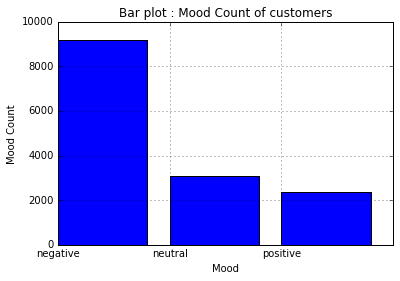

In [38]:
#Visualize the target variable in a bar plot for categorical target.
mood_index=[1,2,3]
mood_count=y.value_counts().tolist()
plt.bar(mood_index,mood_count)
plt.xlabel('Mood')
plt.ylabel('Mood Count')
plt.title('Bar plot : Mood Count of customers')
plt.xticks(mood_index,['negative','neutral','positive'])
#plt.yticks(np.arange(min(mood_count), max(mood_count)+1000),1000)
plt.grid()
plt.show()

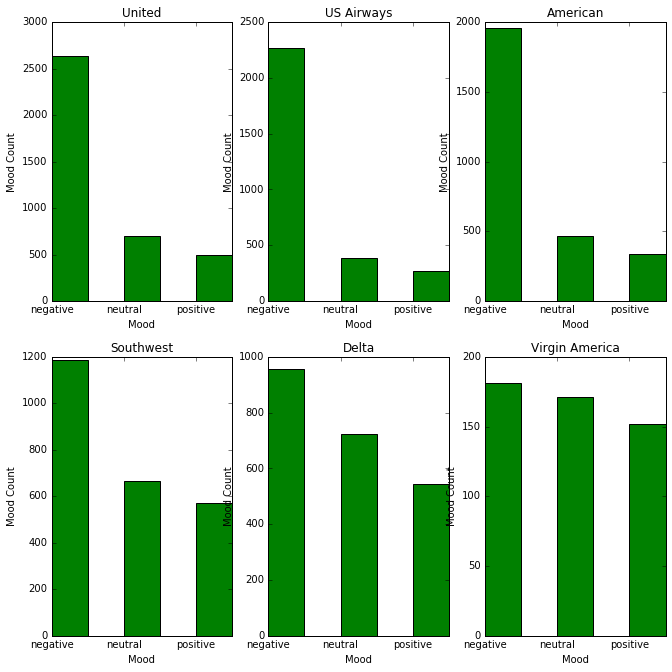

In [39]:
#Visualizing the features: Mood (Target variable y) of customers w.r.t various airlines (airline of X):
sel_feat=tweet.iloc[:,(5,1)]
def plot_airline_sentiment(airline):
    filt=sel_feat[sel_feat['airline']==airline]
    X=filt.iloc[:,0]
    y=filt.iloc[:,1]
    mood_index=[1,2,3]
    mood_count=y.value_counts().tolist()
    plt.bar(mood_index,mood_count,width=0.5, color='g')
    plt.xlabel('Mood')
    plt.ylabel('Mood Count')
    plt.title(airline)
    plt.xticks(mood_index,['negative','neutral','positive'])

#Call function "plot_airline_sentiment" for each airline company   
plt.figure(1,figsize=(11, 11))
plt.subplot(231)
plot_airline_sentiment('United')  
plt.subplot(232)
plot_airline_sentiment('US Airways')
plt.subplot(233)
plot_airline_sentiment('American')
plt.subplot(234)
plot_airline_sentiment('Southwest')
plt.subplot(235)
plot_airline_sentiment('Delta')
plt.subplot(236)
plot_airline_sentiment('Virgin America')

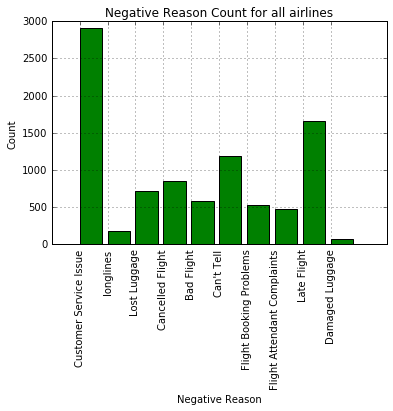

In [40]:
#Visualizing the features: Negative reasons (negativereason of x) of customers w.r.t. count:
dc= dict(tweet['negativereason'].value_counts())
df = pd.DataFrame(list(dc.items()), columns=['Reason', 'Count'])
y=df.Count
X=range(1,(len(df.Reason)+1))
plt.bar(X,y,color='g')
plt.xlabel('Negative Reason')
plt.ylabel('Count')
plt.title('Negative Reason Count for all airlines')
plt.xticks(X,df.Reason,rotation=90)
plt.grid()
plt.show()

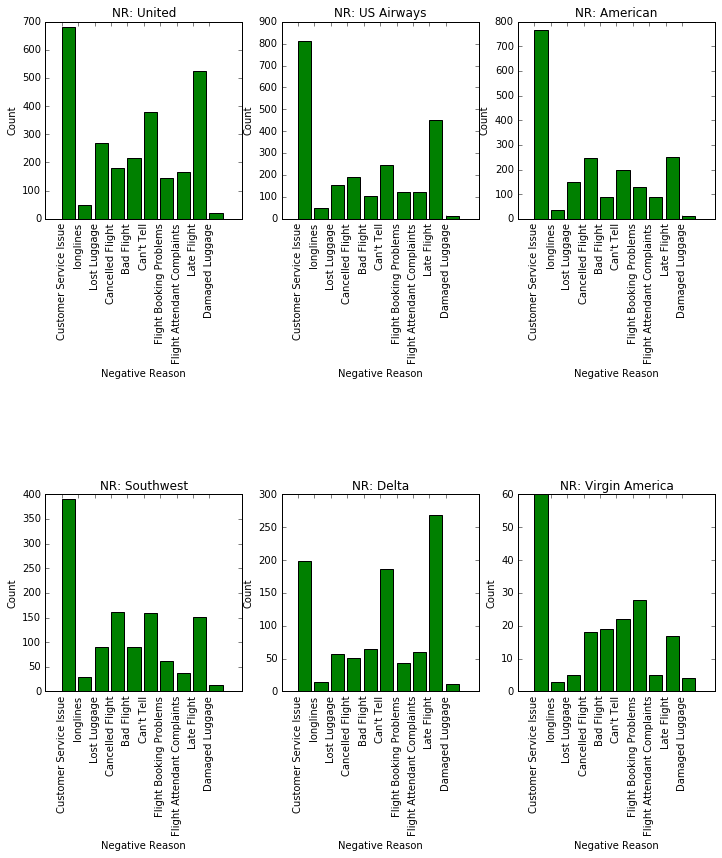

In [41]:
#Visualizing the features: Negative reasons (negativereason of x) of customers w.r.t. airlines (airline of x):
def plot_airline_nreason(airline):
    sel_feat=tweet[tweet['airline']==airline]
    dc= dict(sel_feat['negativereason'].value_counts())
    df = pd.DataFrame(list(dc.items()), columns=['Reason', 'Count'])
    y=df.Count
    X=range(1,(len(df.Reason)+1))
    plt.bar(X,y,color='g')
    plt.xlabel('Negative Reason')
    plt.ylabel('Count')
    plt.title('NR: '+ airline)
    plt.xticks(X,df.Reason,rotation=90)

#Call function "plot_airline_sentiment" for each airline company   
plt.figure(1,figsize=(12, 12))
plt.subplot(331)
plot_airline_nreason('United')  
plt.subplot(332)
plot_airline_nreason('US Airways')
plt.subplot(333)
plot_airline_nreason('American')
plt.subplot(337)
plot_airline_nreason('Southwest')
plt.subplot(338)
plot_airline_nreason('Delta')
plt.subplot(339)
plot_airline_nreason('Virgin America')   

In [42]:
#Preprocess the data {'negative': 0 , 'positive': 1 , 'neutral': 2}
import re
import warnings
warnings.filterwarnings("ignore")

df=tweet.iloc[:,(10,1)]
df.columns = ['data', 'target']
df['target']=df['target'].str.strip().str.lower()
df['target']=df['target'].map({'negative': 0 , 'positive': 1 , 'neutral': 2})

#Remove unwanted text from tweet
df['data']=df['data'].str.replace("[^a-zA-Z]", " ")
df['data']=df['data'].str.strip().str.lower()

#Check any null values left in tweet
nullval=df['data'][df['data'].isnull()]
#nullval.value_counts()
#df

In [43]:
#Vectorizing data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',analyzer="word",min_df = 2, max_df = 0.8)
data_dtm = vect.fit_transform(df['data'])
feat_dtm = vect.get_feature_names()

#Count words with frequencies
freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
freq_tbl['Word']=freq_tbl['Word'].str.strip()
freq_tbl['frequency'] = freq_tbl['Occurence']/np.sum(freq_tbl['Occurence'])

#Ignore airline names from word count as they do not add value
ignore_list=['united','usairways','americanair','southwestair','virginamerica','jetblue','http', 'RT',
             'flight', 'flights','plane']
freq_output = freq_tbl[-freq_tbl['Word'].isin(ignore_list)]

#Filter words whose lenth is less than 2 chars
freq_output = freq_output[freq_output['Word'].str.len()>3]

#Print top 100 words with frequencies
freq_output.sort(['Occurence'], ascending=[False]).head(100)

,Occurence,Word,frequency
5067,1083,thanks,0.008557
723,1065,cancelled,0.008415
2749,974,just,0.007696
4528,967,service,0.007641
2338,874,help,0.006906
5123,794,time,0.006274
1227,758,customer,0.005989
2430,684,hours,0.005405
2372,644,hold,0.005088
5063,605,thank,0.004780


      Occurence       Word  frequency
5067       1083     thanks   0.008557
723        1065  cancelled   0.008415
2749        974       just   0.007696
4528        967    service   0.007641
2338        874       help   0.006906
5123        794       time   0.006274
1227        758   customer   0.005989
2430        684      hours   0.005405
2372        644       hold   0.005088
5063        605      thank   0.004780


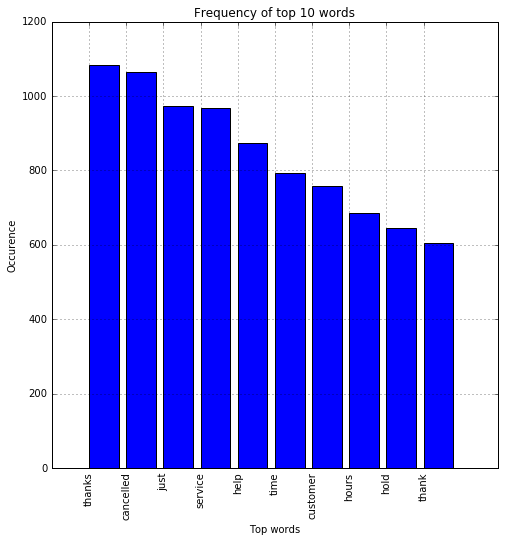

In [44]:
#Plot top 10 features based on the frequencies
topt=freq_output.sort(['Occurence'], ascending=[False]).head(10)
print(topt)
y=topt['Occurence']
plt.figure(1,figsize=(8, 8))
plt.grid()
X=range(1, 11)
plt.bar(X,y)
plt.xlabel('Top words')
plt.ylabel('Occurence')
plt.title('Frequency of top 10 words')
plt.xticks(X,topt['Word'],rotation=90)
plt.show() 